In [1]:
# 객체 탐지

In [5]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
results = model('1.jpg')
results 



image 1/1 c:\Users\Admin\Desktop\LG_U\dl_llm\1.jpg: 640x640 3 persons, 50.4ms
Speed: 2.8ms preprocess, 50.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

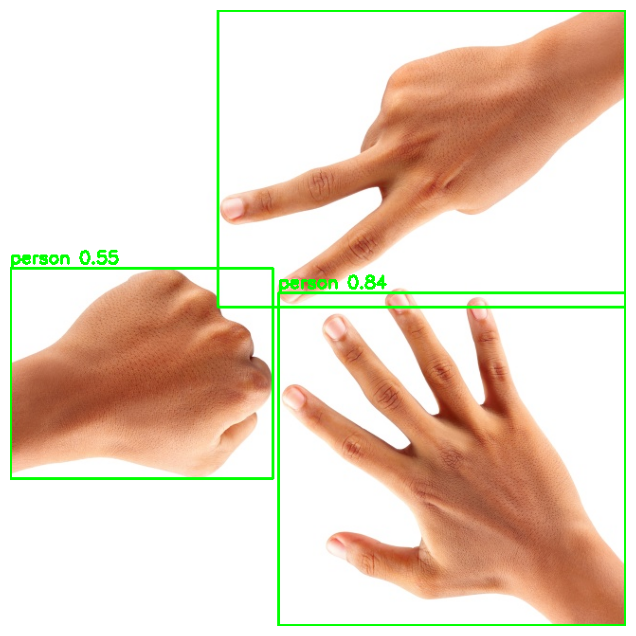

In [6]:
# 바운딩 박스, 라벨 출력
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for r in results:
    for box in r.boxes:
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # 사각형 그리기
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_rgb, f"{model.names[cls]} {conf:.2f}",
                    (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 255, 0), 2)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [10]:
# 자세
pose_model = YOLO('yolov8n-pose.pt')
pose_results = pose_model('pose.jpg')
img = cv2.imread('pose.jpg')
kp = pose_results[0].keypoints 

for man_kp in kp:
    for x,y in man_kp.xy[0]:
        if x> 0 and y>0:
            cv2.circle(img, (int(x), int(y)), 3, (255,0,0), -1)
            
cv2.imshow('yolov8 pose', img)
cv2.waitKey(0)
cv2.destroyWindow()
cv2.imwrite('pose.jpg', img)


image 1/1 c:\Users\Admin\Desktop\LG_U\dl_llm\pose.jpg: 640x480 1 person, 45.4ms
Speed: 2.1ms preprocess, 45.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


TypeError: destroyWindow() missing required argument 'winname' (pos 1)